# APMTH 207: Advanced Scientific Computing: 
## Stochastic Methods for Data Analysis, Inference and Optimization
## Homework #8
**Harvard University**<br>
**Spring 2017**<br>
**Instructors: Rahul Dave**<br>
**Due Date: ** Friday, March 31st, 2017 at 11:59pm

**Instructions:**

- Upload your final answers as well as your iPython notebook containing all work to Canvas.

- Structure your notebook and your work to maximize readability.

## Problem 1: Application of Data Augmentation

A plant nursery in Cambridge is exprimentally cross-breeding two types of hibiscus flowers: blue and pink. The goal is to create an exotic flower whose petals are pink with a ring of blue on each. 

There are four types of child plant that can result from this cross-breeding: 

  - Type 1: blue petals
  - Type 2: pink petals 
  - Type 3: purple petals
  - Type 4: pink petals with a blue ring on each (the desired effect). 

Out of 197 initial cross-breedings, the nursery obtained the following distribution over the four types of child plants: 
$$Y = (y_1, y_2, y_3, y_4) = (125, 18, 20, 34)$$
where $y_i$ represents the number of child plants that are of type $i$.

The nursery then consulted a famed Harvard plant geneticist, who informed them that the probability of obtaining each type of child plant in any single breeding experiment is as follows:
$$ \frac{\theta+2}{4}, \frac{1-\theta}{4}, \frac{1-\theta}{4}, \frac{\theta}{4}.$$
Unfortunately, the geneticist did not specify the quantity $\theta$.

Clearly, the nursery is interested in understanding how many cross-breeding they must perform, on average, in order to obtain a certain number of child plants with the exotic blue rings. To do this they must be able to compute $\theta$. 

The owners of the nursery, being top students in AM207, decided to model the experiment in hopes of discovering $\theta$ using the results from their 197 initial experiments. 

They chose to model the observed data using a multinomial model and thus calculated the likelihood to be:
$$ p(y  \vert  \theta) \propto (2+\theta)^{y_1} (1-\theta)^{y_2+y_3}  \, \theta^{y_4}
$$

Being good Bayesians, they also imposed a prior on $\theta$, $\rm{Beta}(a, b)$.

Thus, the posterior is:
$$ p(\theta \vert  Y) \propto \left( 2+\theta \right)^{y_1} (1-\theta)^{y_2+y_3} \, \theta^{
y_4} \, \theta^{a-1} \, (1-\theta)^{b-1}. $$

If the nursery owners are able to sample from the posterior, they would be understand the distribution of $\theta$ and make appropriate estimates.

### Part A: Sampling using data augmentation

Realizing that it would be difficult to sample from the posterior directly and after being repeatedly frustrated by attempts of Metropolis-Hastings and Gibbs sampling for this model, the nursery owners decided to augment their model and hopefully obtain a friendlier looking distribution that allows for easy sampling.

They augment the data with a new variable $z$ such that:
$$z + (y_1 - z) = y_1.$$
That is, using $z$, we are breaking $y_1$, the number of type I child plants, into two subtypes. Let the probability of obtain the two subtype be $1/2$ and $\theta/4$, respectively. Now, we can interpret $y_1$ to be the total number of trials in a binomial trial. Thus, the new likelihood can be written as
$$ p(y, z  \vert  \theta) \propto \binom{y_{1}}{z} \left (\frac{1}{2} \right )^{y_1-z} \left(\frac{\theta}{4} \right )^{z}  (1-\theta)^{y_2+y_3}  \, \theta^{y_4}
$$


Derived the joint posterior $p(\theta, z  \vert  y)$ and sample from it using Gibbs sampling.

Visualize the distribution of theta and, from this distribution, estimate the probability of obtaining a type 4 child plant (with the blue rings) in any cross-breeding experiment.

In [1]:
%matplotlib inline
import numpy as np
from scipy import stats
from scipy.stats import norm
from scipy.stats import beta,binom
from scipy.stats import distributions
import matplotlib.pyplot as plt
import seaborn as sns
import time
sns.set_style('white')
sns.set_context('paper')
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)


<font color = "blue">
Suppose we impose a prior on $\theta$ - $Beta(a,b)$ 
Given a multinomial model and thus calculated the likelihood to be:
$$ p(y  \vert  \theta) \propto (2+\theta)^{y_1} (1-\theta)^{y_2+y_3}  \, \theta^{y_4}
$$
The marginal pdf of y is:
$$
p(y)\propto p(y\vert \theta )p(\theta )\propto (2+\theta )^{ y_{ 1 } }(1-\theta )^{ y_{ 2 }+y_{ 3 } }\, \theta ^{ y_{ 4 } }(1-\theta )^{ \beta -1 }\, \theta ^{ \alpha -1 }=(2+\theta )^{ y_{ 1 } }(1-\theta )^{ y_{ 2 }+y_{ 3 }+\beta -1 }\theta ^{ y_{ 4 }+\alpha -1 }
$$

Since the likelihood can be written as
$$ p(y, z  \vert  \theta) \propto \binom{y_{1}}{z} \left (\frac{1}{2} \right )^{y_1-z} \left(\frac{\theta}{4} \right )^{z}  (1-\theta)^{y_2+y_3}  \, \theta^{y_4}
$$

The joint posterior $$ p(\theta ,z\vert y)\propto p(y,z\vert \theta )p(\theta )\propto \binom{y_{1}}{z}  \left( \frac { 1 }{ 2 }  \right) ^{ y_{ 1 }-z }\left( \frac { \theta  }{ 4 }  \right) ^{ z }(1-\theta )^{ y_{ 2 }+y_{ 3 } }\, \theta ^{ y_{ 4 } }Beta(a,b)=\binom{y_{1}}{z} \left( \frac { 1 }{ 2 }  \right) ^{ y_{ 1 }-z }\left( \frac { \theta  }{ 4 }  \right) ^{ z }(1-\theta )^{ y_{ 2 }+y_{ 3 }+b-1 }\, \theta ^{ y_{ 4 } +a-1}$$ 


Using Gibbs Sampling,
$$p(\theta \vert y,z)\propto p(y,z\vert \theta )p(\theta )\propto (1-\theta )^{ y_{ 2 }+y_{ 3 }+b-1 }\, \theta ^{ z+y_{ 4 }+a-1 } \sim Beta(z+y_{ 4 }+a, y_{ 2 }+y_{ 3 }+b )
$$

$$
p(z\vert \theta ,y)\propto \binom{y_{1}}{z} \left( \frac { 1 }{ 2 }  \right) ^{ y_{ 1 }-z }\left( \frac { \theta  }{ 4 }  \right) ^{ z } $$

Since $  \frac { 1 }{ 2 }  +\frac { \theta  }{ 4 } =\frac { 2+\theta  }{ 4 } \neq 1$, we need to normalize it,

$$
p(z\vert \theta ,y)\propto \frac { { y_{ 1 } }{ z }\left( \frac { 1 }{ 2 } \times \frac { 4 }{ 2+\theta  }  \right) ^{ y_{ 1 }-z }\left( \frac { \theta  }{ 4 } \times \frac { 4 }{ 2+\theta  }  \right) ^{ z } }{ (\frac { 4 }{ 2+\theta  } )^{ y_{ 1 } } } \propto { y_{ 1 } }{ z }\left( \frac { 1 }{ 2 } \times \frac { 4 }{ 2+\theta  }  \right) ^{ y_{ 1 }-z }\left( \frac { \theta  }{ 4 } \times \frac { 4 }{ 2+\theta  }  \right) ^{ z } \sim Binomial(y_1,\frac { \theta  }{ 4 } \times \frac { 4 }{ 2+\theta  } )
$$

<font color = "blue">
#### To choose a resonable prior,first we calcuate the probability of each category given the data.

In [20]:
y = [125,18,20,34]
y1 = y[0]
y2 = y[1]
y3 = y[2]
y4 = y[3]

a = 1
b = 1
p = y/np.sum(y)
print ('Probability of each category:',p)

theta = [4*p[0]-2,1-4*p[1],1-4*p[2],4*p[3]]
print ('theta:',theta)
print ('variance of theta:',np.var(theta))
print ('mean of theta:',np.mean(theta))

Probability of each category: [ 0.63451777  0.09137056  0.10152284  0.17258883]
theta: [0.53807106598984777, 0.63451776649746194, 0.59390862944162437, 0.69035532994923854]
variance of theta: 0.00310494988276
mean of theta: 0.61421319797


<font color = "blue">
Since for Beta(a,b), $$mean = \frac{a}{a+b}$$, $$var = \frac{ab}{(a+b)^2(a+b+1)}$$

to make the mean and variance close to what we approximated before, we set a = 110, b = 70.

<font color = "blue">
$$\theta \sim Beta(a,b)$$
$$var(\theta) = $$
Based on the relaitonship between $\theta$ and probability, $\theta$ is more likely 0.6

In [23]:
a = 70
b = 110
N = 100000
theta = np.zeros(N) 

z = np.zeros(N)
theta[0] = beta.rvs(a, b)
z[0] = 1
for i in np.arange(1,N):
    z[i] = binom.rvs(y1, theta[i-1]/(2+theta[i-1]))
    theta[i]=beta.rvs(z[i] + y4 + a , y2 + y3 + b)
    


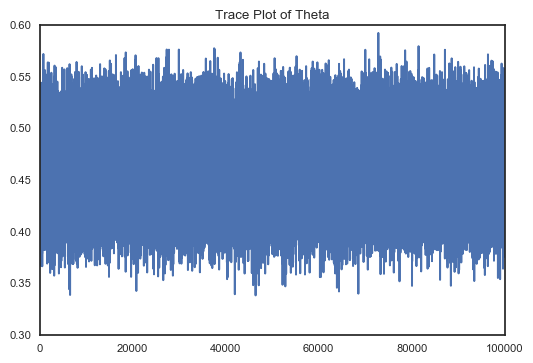

In [25]:
plt.title('Trace Plot of Theta')
plt.plot(theta)
plt.show()

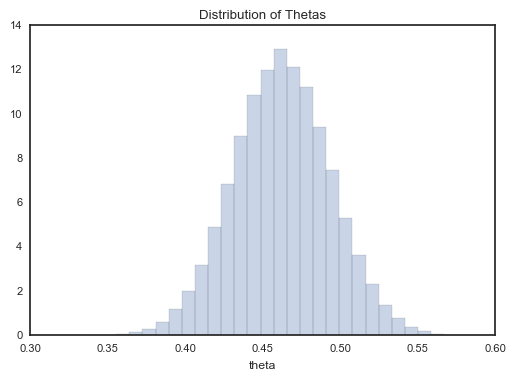

In [26]:

plt.hist(theta, bins=30, alpha=0.3, normed=True)
plt.title('Distribution of Thetas')
plt.xlabel('theta')
plt.show()

In [27]:
y_sum = np.sum(y)
theta_mean = np.mean(theta)
n_type4 = theta_mean/4.
print ('The estimate of the probability of obtaining a type 4 child plant ',n_type4)

The estimate of the probability of obtaining a type 4 child plant  0.115628112907


<font color = "blue">
#### If we use uniform prior that $\theta \sim Beta(1,1)$,  a,b = 1

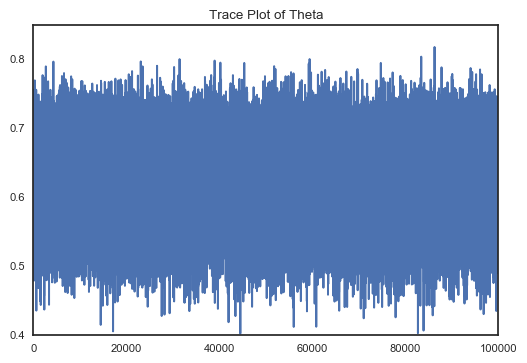

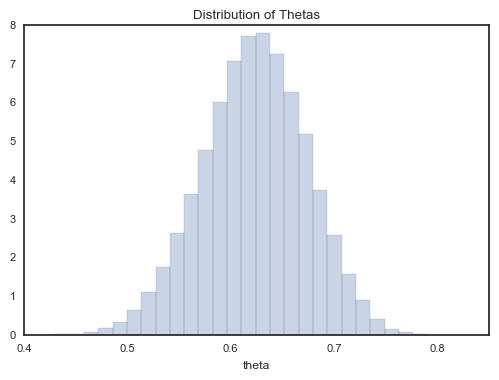

In [30]:
a = 1
b = 1
N = 100000
theta = np.zeros(N) 
z[0] = 1.
z = np.zeros(N)
theta[0] = beta.rvs(a, b)
for i in np.arange(1,N):
    z[i] = binom.rvs(y1, theta[i-1]/(2+theta[i-1]))
    theta[i]=beta.rvs(z[i] + y4 + a , y2 + y3 + b)
    
plt.title('Trace Plot of Theta')
plt.plot(theta)
plt.show()

plt.hist(theta, bins=30, alpha=0.3, normed=True)
plt.title('Distribution of Thetas')
plt.xlabel('theta')
plt.show()

In [31]:
y_sum = np.sum(y)
theta_mean = np.mean(theta)
n_type4 = theta_mean/4.
print ('The estimate of the probability of obtaining a type 4 child plant ',n_type4)

The estimate of the probability of obtaining a type 4 child plant  0.155752156941


<font color = "blue">
As shown in these two case when choosing different priors, the results are not very similar. When the number of samples is not very sufficient, it seems that the priors will have a impact on the our posterior.